In [1]:
%matplotlib notebook

import glob
import numpy              as np
import matplotlib.pyplot as plt

from astropy.io           import fits
from scipy                import stats
from scipy.optimize       import curve_fit
from scipy                import signal
from photutils import detect_sources
from astropy.visualization import scale_image

from photutils.utils import random_cmap
rand_cmap = random_cmap(random_state=12345)

In [2]:
sim01_info = sorted(glob.glob('processed/sim01_100/info/info_rei00001_*'))
sim02_info = sorted(glob.glob('processed/sim02_100/info/info_rei00002_*'))
sim03_info = sorted(glob.glob('processed/sim03_100/info/info_rei00003_*'))
sim04_info = sorted(glob.glob('processed/sim04_100/info/info_rei00004_*'))
sim06_info = sorted(glob.glob('processed/sim06_100/info/info_rei00006_*'))
sim09_info = sorted(glob.glob('processed/sim09_100/info/info_rei00009_*'))

sim_01_HST_data_x = sorted(glob.glob('processed/sim01_100/data/sim_01_f140w_x3_*'))
sim_01_HST_data_y = sorted(glob.glob('processed/sim01_100/data/sim_01_f140w_y3_*'))
sim_01_HST_data_z = sorted(glob.glob('processed/sim01_100/data/sim_01_f140w_z3_*'))
sim_01_JWST_data_x = sorted(glob.glob('processed/sim01_100/data/sim_01_F150W_x3_*'))
sim_01_JWST_data_y = sorted(glob.glob('processed/sim01_100/data/sim_01_F150W_y3_*'))
sim_01_JWST_data_z = sorted(glob.glob('processed/sim01_100/data/sim_01_F150W_z3_*'))
                             
sim_02_HST_data_x = sorted(glob.glob('processed/sim02_100/data/sim_02_f140w_x3_*'))
sim_02_HST_data_y = sorted(glob.glob('processed/sim02_100/data/sim_02_f140w_y3_*'))
sim_02_HST_data_z = sorted(glob.glob('processed/sim02_100/data/sim_02_f140w_z3_*'))
sim_02_JWST_data_x = sorted(glob.glob('processed/sim02_100/data/sim_02_F150W_x3_*'))
sim_02_JWST_data_y = sorted(glob.glob('processed/sim02_100/data/sim_02_F150W_y3_*'))
sim_02_JWST_data_z = sorted(glob.glob('processed/sim02_100/data/sim_02_F150W_z3_*'))
                             
sim_03_HST_data_x = sorted(glob.glob('processed/sim03_100/data/sim_03_f140w_x3_*'))
sim_03_HST_data_y = sorted(glob.glob('processed/sim03_100/data/sim_03_f140w_y3_*'))
sim_03_HST_data_z = sorted(glob.glob('processed/sim03_100/data/sim_03_f140w_z3_*'))
sim_03_JWST_data_x = sorted(glob.glob('processed/sim03_100/data/sim_03_F150W_x3_*'))
sim_03_JWST_data_y = sorted(glob.glob('processed/sim03_100/data/sim_03_F150W_y3_*'))
sim_03_JWST_data_z = sorted(glob.glob('processed/sim03_100/data/sim_03_F150W_z3_*'))

sim_04_HST_data_x = sorted(glob.glob('processed/sim04_100/data/sim_04_f140w_x3_*'))
sim_04_HST_data_y = sorted(glob.glob('processed/sim04_100/data/sim_04_f140w_y3_*'))
sim_04_HST_data_z = sorted(glob.glob('processed/sim04_100/data/sim_04_f140w_z3_*'))
sim_04_JWST_data_x = sorted(glob.glob('processed/sim04_100/data/sim_04_F150W_x3_*'))
sim_04_JWST_data_y = sorted(glob.glob('processed/sim04_100/data/sim_04_F150W_y3_*'))
sim_04_JWST_data_z = sorted(glob.glob('processed/sim04_100/data/sim_04_F150W_z3_*'))

sim_06_HST_data_x = sorted(glob.glob('processed/sim06_100/data/sim_06_f140w_x3_*'))
sim_06_HST_data_y = sorted(glob.glob('processed/sim06_100/data/sim_06_f140w_y3_*'))
sim_06_HST_data_z = sorted(glob.glob('processed/sim06_100/data/sim_06_f140w_z3_*'))
sim_06_JWST_data_x = sorted(glob.glob('processed/sim06_100/data/sim_06_F150W_x3_*'))
sim_06_JWST_data_y = sorted(glob.glob('processed/sim06_100/data/sim_06_F150W_y3_*'))
sim_06_JWST_data_z = sorted(glob.glob('processed/sim06_100/data/sim_06_F150W_z3_*'))
                             
sim_09_HST_data_x = sorted(glob.glob('processed/sim09_100/data/sim_09_f140w_x3_*'))
sim_09_HST_data_y = sorted(glob.glob('processed/sim09_100/data/sim_09_f140w_y3_*'))
sim_09_HST_data_z = sorted(glob.glob('processed/sim09_100/data/sim_09_f140w_z3_*'))
sim_09_JWST_data_x = sorted(glob.glob('processed/sim09_100/data/sim_09_F150W_x3_*'))
sim_09_JWST_data_y = sorted(glob.glob('processed/sim09_100/data/sim_09_F150W_y3_*'))
sim_09_JWST_data_z = sorted(glob.glob('processed/sim09_100/data/sim_09_F150W_z3_*'))

In [3]:
sim_01_number_of_sources = np.zeros((len(sim_01_HST_data_x), 2, 3))
sim_02_number_of_sources = np.zeros((len(sim_02_HST_data_x), 2, 3))
sim_03_number_of_sources = np.zeros((len(sim_03_HST_data_x), 2, 3))
sim_04_number_of_sources = np.zeros((len(sim_04_HST_data_x), 2, 3))
sim_06_number_of_sources = np.zeros((len(sim_06_HST_data_x), 2, 3))
sim_09_number_of_sources = np.zeros((len(sim_09_HST_data_x), 2, 3))

sim_01_redshifts = []
for i in range(0,len(sim_01_HST_data_x)):
    redshift, D_A, Angular_size, c_x, c_y, c_z, r = np.loadtxt(sim01_info[i], skiprows=1)
    sim_01_redshifts.append(redshift)
sim_01_ang_size = Angular_size

sim_02_redshifts = []
for i in range(0,len(sim_02_HST_data_x)):
    redshift, D_A, Angular_size, c_x, c_y, c_z, r = np.loadtxt(sim02_info[i], skiprows=1)
    sim_02_redshifts.append(redshift)
sim_02_ang_size = Angular_size

sim_03_redshifts = []
for i in range(0,len(sim_03_HST_data_x)):
    redshift, D_A, Angular_size, c_x, c_y, c_z, r = np.loadtxt(sim03_info[i], skiprows=1)
    sim_03_redshifts.append(redshift)
sim_03_ang_size = Angular_size

sim_04_redshifts = []
for i in range(0,len(sim_04_HST_data_x)):
    redshift, D_A, Angular_size, c_x, c_y, c_z, r = np.loadtxt(sim04_info[i], skiprows=1)
    sim_04_redshifts.append(redshift)
sim_04_ang_size = Angular_size

sim_06_redshifts = []
for i in range(0,len(sim_06_HST_data_x)):
    redshift, D_A, Angular_size, c_x, c_y, c_z, r = np.loadtxt(sim06_info[i], skiprows=1)
    sim_06_redshifts.append(redshift)
sim_06_ang_size = Angular_size

sim_09_redshifts = []
for i in range(0,len(sim_09_HST_data_x)):
    redshift, D_A, Angular_size, c_x, c_y, c_z, r = np.loadtxt(sim09_info[i], skiprows=1)
    sim_09_redshifts.append(redshift)
sim_09_ang_size = Angular_size

print(sim_01_ang_size)
print(sim_02_ang_size)
print(sim_03_ang_size)
print(sim_04_ang_size)
print(sim_06_ang_size)
print(sim_09_ang_size)

32.3735689973
32.4246750341
33.9930433782
32.4306058448
33.213491504
32.4911839894


In [41]:
threshold = 3
npixels = 4

for i in range(0,len(sim_01_HST_data_x)):
    
    temp = np.loadtxt(sim_01_HST_data_x[i])
    sim_01_number_of_sources[i, 0, 0] = detect_sources(temp, threshold, npixels).nlabels
    temp = np.loadtxt(sim_01_HST_data_y[i])
    sim_01_number_of_sources[i, 0, 1] = detect_sources(temp, threshold, npixels).nlabels
    temp = np.loadtxt(sim_01_HST_data_z[i])
    sim_01_number_of_sources[i, 0, 2] = detect_sources(temp, threshold, npixels).nlabels
    
    temp = np.loadtxt(sim_01_JWST_data_x[i])
    sim_01_number_of_sources[i, 1, 0] = detect_sources(temp, threshold, npixels).nlabels
    temp = np.loadtxt(sim_01_JWST_data_y[i])
    sim_01_number_of_sources[i, 1, 1] = detect_sources(temp, threshold, npixels).nlabels
    temp = np.loadtxt(sim_01_JWST_data_z[i])
    sim_01_number_of_sources[i, 1, 2] = detect_sources(temp, threshold, npixels).nlabels
    

In [42]:
for i in range(0,len(sim_02_HST_data_x)):
    
    temp = np.loadtxt(sim_02_HST_data_x[i])
    sim_02_number_of_sources[i, 0, 0] = detect_sources(temp, threshold, npixels).nlabels
    temp = np.loadtxt(sim_02_HST_data_y[i])
    sim_02_number_of_sources[i, 0, 1] = detect_sources(temp, threshold, npixels).nlabels
    temp = np.loadtxt(sim_02_HST_data_z[i])
    sim_02_number_of_sources[i, 0, 2] = detect_sources(temp, threshold, npixels).nlabels
    
    temp = np.loadtxt(sim_02_JWST_data_x[i])
    sim_02_number_of_sources[i, 1, 0] = detect_sources(temp, threshold, npixels).nlabels
    temp = np.loadtxt(sim_02_JWST_data_y[i])
    sim_02_number_of_sources[i, 1, 1] = detect_sources(temp, threshold, npixels).nlabels
    temp = np.loadtxt(sim_02_JWST_data_z[i])
    sim_02_number_of_sources[i, 1, 2] = detect_sources(temp, threshold, npixels).nlabels
 

In [43]:
for i in range(0,len(sim_03_HST_data_x)):
    
    temp = np.loadtxt(sim_03_HST_data_x[i])
    sim_03_number_of_sources[i, 0, 0] = detect_sources(temp, threshold, npixels).nlabels
    temp = np.loadtxt(sim_03_HST_data_y[i])
    sim_03_number_of_sources[i, 0, 1] = detect_sources(temp, threshold, npixels).nlabels
    temp = np.loadtxt(sim_03_HST_data_z[i])
    sim_03_number_of_sources[i, 0, 2] = detect_sources(temp, threshold, npixels).nlabels
    
    temp = np.loadtxt(sim_03_JWST_data_x[i])
    sim_03_number_of_sources[i, 1, 0] = detect_sources(temp, threshold, npixels).nlabels
    temp = np.loadtxt(sim_03_JWST_data_y[i])
    sim_03_number_of_sources[i, 1, 1] = detect_sources(temp, threshold, npixels).nlabels
    temp = np.loadtxt(sim_03_JWST_data_z[i])
    sim_03_number_of_sources[i, 1, 2] = detect_sources(temp, threshold, npixels).nlabels
    

In [44]:
for i in range(0,len(sim_04_HST_data_x)):
    
    temp = np.loadtxt(sim_04_HST_data_x[i])
    sim_04_number_of_sources[i, 0, 0] = detect_sources(temp, threshold, npixels).nlabels
    temp = np.loadtxt(sim_04_HST_data_y[i])
    sim_04_number_of_sources[i, 0, 1] = detect_sources(temp, threshold, npixels).nlabels
    temp = np.loadtxt(sim_04_HST_data_z[i])
    sim_04_number_of_sources[i, 0, 2] = detect_sources(temp, threshold, npixels).nlabels
    
    temp = np.loadtxt(sim_04_JWST_data_x[i])
    sim_04_number_of_sources[i, 1, 0] = detect_sources(temp, threshold, npixels).nlabels
    temp = np.loadtxt(sim_04_JWST_data_y[i])
    sim_04_number_of_sources[i, 1, 1] = detect_sources(temp, threshold, npixels).nlabels
    temp = np.loadtxt(sim_04_JWST_data_z[i])
    sim_04_number_of_sources[i, 1, 2] = detect_sources(temp, threshold, npixels).nlabels
    

In [45]:
for i in range(0,len(sim_06_HST_data_x)):
    
    temp = np.loadtxt(sim_06_HST_data_x[i])
    sim_06_number_of_sources[i, 0, 0] = detect_sources(temp, threshold, npixels).nlabels
    temp = np.loadtxt(sim_06_HST_data_y[i])
    sim_06_number_of_sources[i, 0, 1] = detect_sources(temp, threshold, npixels).nlabels
    temp = np.loadtxt(sim_06_HST_data_z[i])
    sim_06_number_of_sources[i, 0, 2] = detect_sources(temp, threshold, npixels).nlabels
    
    temp = np.loadtxt(sim_06_JWST_data_x[i])
    sim_06_number_of_sources[i, 1, 0] = detect_sources(temp, threshold, npixels).nlabels
    temp = np.loadtxt(sim_06_JWST_data_y[i])
    sim_06_number_of_sources[i, 1, 1] = detect_sources(temp, threshold, npixels).nlabels
    temp = np.loadtxt(sim_06_JWST_data_z[i])
    sim_06_number_of_sources[i, 1, 2] = detect_sources(temp, threshold, npixels).nlabels
    

In [46]:
for i in range(0,len(sim_09_HST_data_x)):
    
    temp = np.loadtxt(sim_09_HST_data_x[i])
    sim_09_number_of_sources[i, 0, 0] = detect_sources(temp, threshold, npixels).nlabels
    temp = np.loadtxt(sim_09_HST_data_y[i])
    sim_09_number_of_sources[i, 0, 1] = detect_sources(temp, threshold, npixels).nlabels
    temp = np.loadtxt(sim_09_HST_data_z[i])
    sim_09_number_of_sources[i, 0, 2] = detect_sources(temp, threshold, npixels).nlabels
    
    temp = np.loadtxt(sim_09_JWST_data_x[i])
    sim_09_number_of_sources[i, 1, 0] = detect_sources(temp, threshold, npixels).nlabels
    temp = np.loadtxt(sim_09_JWST_data_y[i])
    sim_09_number_of_sources[i, 1, 1] = detect_sources(temp, threshold, npixels).nlabels
    temp = np.loadtxt(sim_09_JWST_data_z[i])
    sim_09_number_of_sources[i, 1, 2] = detect_sources(temp, threshold, npixels).nlabels


In [47]:
def trial_f(x,a,b,c):
    #return a + b*x +c*x*x + d*x*x*x
    return a/x/x + b/x/x/x + c/x/x/x/x

HST_01 = (sim_01_number_of_sources[:, 0, 0] + sim_01_number_of_sources[:, 0, 1] + sim_01_number_of_sources[:, 0, 2])/3
JWST_01 = (sim_01_number_of_sources[:, 1, 0] + sim_01_number_of_sources[:, 1, 1] + sim_01_number_of_sources[:, 1, 2])/3

HST_02 = (sim_02_number_of_sources[:, 0, 0] + sim_02_number_of_sources[:, 0, 1] + sim_02_number_of_sources[:, 0, 2])/3
JWST_02 = (sim_02_number_of_sources[:, 1, 0] + sim_02_number_of_sources[:, 1, 1] + sim_02_number_of_sources[:, 1, 2])/3

HST_03 = (sim_03_number_of_sources[:, 0, 0] + sim_03_number_of_sources[:, 0, 1] + sim_03_number_of_sources[:, 0, 2])/3
JWST_03 = (sim_03_number_of_sources[:, 1, 0] + sim_03_number_of_sources[:, 1, 1] + sim_03_number_of_sources[:, 1, 2])/3

HST_04 = (sim_04_number_of_sources[:, 0, 0] + sim_04_number_of_sources[:, 0, 1] + sim_04_number_of_sources[:, 0, 2])/3
JWST_04 = (sim_04_number_of_sources[:, 1, 0] + sim_04_number_of_sources[:, 1, 1] + sim_04_number_of_sources[:, 1, 2])/3

HST_06 = (sim_06_number_of_sources[:, 0, 0] + sim_06_number_of_sources[:, 0, 1] + sim_06_number_of_sources[:, 0, 2])/3
JWST_06 = (sim_06_number_of_sources[:, 1, 0] + sim_06_number_of_sources[:, 1, 1] + sim_06_number_of_sources[:, 1, 2])/3

HST_09 = (sim_09_number_of_sources[:, 0, 0] + sim_09_number_of_sources[:, 0, 1] + sim_09_number_of_sources[:, 0, 2])/3
JWST_09 = (sim_09_number_of_sources[:, 1, 0] + sim_09_number_of_sources[:, 1, 1] + sim_09_number_of_sources[:, 1, 2])/3

redshifts_sample = np.linspace(5.5,11.5,500)
redshifts_sample_2 = np.linspace(6,11.5,500)

JWST_params_sim1, cov_mtr = curve_fit(trial_f,sim_01_redshifts,JWST_01)
HST_params_sim1,  cov_mtr = curve_fit(trial_f,sim_01_redshifts,HST_01)

JWST_params_sim2, cov_mtr = curve_fit(trial_f,sim_02_redshifts,JWST_02)
HST_params_sim2,  cov_mtr = curve_fit(trial_f,sim_02_redshifts,HST_02)

JWST_params_sim3, cov_mtr = curve_fit(trial_f,sim_03_redshifts,JWST_03)
HST_params_sim3,  cov_mtr = curve_fit(trial_f,sim_03_redshifts,HST_03)

JWST_params_sim4, cov_mtr = curve_fit(trial_f,sim_04_redshifts,JWST_04)
HST_params_sim4,  cov_mtr = curve_fit(trial_f,sim_04_redshifts,HST_04)

JWST_params_sim6, cov_mtr = curve_fit(trial_f,sim_06_redshifts,JWST_06)
HST_params_sim6,  cov_mtr = curve_fit(trial_f,sim_06_redshifts,HST_06)

JWST_params_sim9, cov_mtr = curve_fit(trial_f,sim_09_redshifts,JWST_09)
HST_params_sim9,  cov_mtr = curve_fit(trial_f,sim_09_redshifts,HST_09)

In [48]:
HST_WFC3CAM_pixel_size = 0.13   # arcsec per pixel
JWST_NIRCAM_pixel_size = 0.032  # arcsec per pixel


def pairs(data_sources,N,X,Y):
    
    if(N>1):
        x_coord = np.zeros(N)
        y_coord = np.zeros(N)

        sources_distances = []
        pairs_distances = []
        pairs = 0

        for j in range(1,N+1):
            A = np.argwhere(data_sources==j)
            x_coord[j-1] = np.mean(X[A[:,0],A[:,1]])
            y_coord[j-1] = np.mean(Y[A[:,0],A[:,1]])

        for i in range(0,N-1):
            A = np.sqrt(np.power((x_coord[i+1:]-x_coord[i]),2) + np.power((y_coord[i+1:]-y_coord[i]),2))
            B = np.where(A<=3)
            pairs += len(B[0])

            sources_distances = np.concatenate((sources_distances,A))
            pairs_distances = np.concatenate((pairs_distances, A[B[0]]))
        if(len(pairs_distances)>0):
            return pairs, np.mean(pairs_distances), np.mean(sources_distances)
        else:
            return pairs, 0, np.mean(sources_distances)
    else: 
        return 0,0,0


In [49]:
Nbins_HST = int(sim_01_ang_size/HST_WFC3CAM_pixel_size)
ang = sim_01_ang_size/2

pixels_ang_coords_HST = (np.linspace(-ang, ang, Nbins_HST + 1) + np.linspace(-ang, ang, Nbins_HST + 1))/2
X_HST,Y_HST = np.meshgrid(pixels_ang_coords_HST,pixels_ang_coords_HST)
sources_sim01_HST = np.zeros((len(sim_01_HST_data_x),3,3))

for i in range(0,len(sim_01_HST_data_x)):
    
    temp = np.loadtxt(sim_01_HST_data_x[i])
    data = detect_sources(temp, threshold, npixels)
    sources_sim01_HST[i,0,0], sources_sim01_HST[i,0,1], sources_sim01_HST[i,0,2] = pairs(np.array(data),data.nlabels,X_HST,Y_HST)
    
    temp = np.loadtxt(sim_01_HST_data_y[i])
    data = detect_sources(temp, threshold, npixels)
    sources_sim01_HST[i,1,0], sources_sim01_HST[i,1,1], sources_sim01_HST[i,1,2] = pairs(np.array(data),data.nlabels,X_HST,Y_HST)
    
    temp = np.loadtxt(sim_01_HST_data_z[i])
    data = detect_sources(temp, threshold, npixels)
    sources_sim01_HST[i,2,0], sources_sim01_HST[i,2,1], sources_sim01_HST[i,2,2] = pairs(np.array(data),data.nlabels,X_HST,Y_HST)

    
Nbins_JWST = int(sim_01_ang_size/JWST_NIRCAM_pixel_size)
ang = sim_01_ang_size/2

pixels_ang_coords_JWST = (np.linspace(-ang, ang, Nbins_JWST + 1) + np.linspace(-ang, ang, Nbins_JWST + 1))/2
X_JWST,Y_JWST = np.meshgrid(pixels_ang_coords_JWST,pixels_ang_coords_JWST)
sources_sim01_JWST = np.zeros((len(sim_01_HST_data_x),3,3))

for i in range(0,len(sim_01_HST_data_x)):
    
    temp = np.loadtxt(sim_01_JWST_data_x[i])
    data = detect_sources(temp, threshold, npixels)
    sources_sim01_JWST[i,0,0], sources_sim01_JWST[i,0,1], sources_sim01_JWST[i,0,2] = pairs(np.array(data),data.nlabels,X_JWST,Y_JWST)
    
    temp = np.loadtxt(sim_01_JWST_data_y[i])
    data = detect_sources(temp, threshold, npixels)
    sources_sim01_JWST[i,1,0], sources_sim01_JWST[i,1,1], sources_sim01_JWST[i,1,2] = pairs(np.array(data),data.nlabels,X_JWST,Y_JWST)
    
    temp = np.loadtxt(sim_01_JWST_data_z[i])
    data = detect_sources(temp, threshold, npixels)
    sources_sim01_JWST[i,2,0], sources_sim01_JWST[i,2,1], sources_sim01_JWST[i,2,2] = pairs(np.array(data),data.nlabels,X_JWST,Y_JWST)

In [50]:
Nbins_HST = int(sim_02_ang_size/HST_WFC3CAM_pixel_size)
ang = sim_02_ang_size/2

pixels_ang_coords_HST = (np.linspace(-ang, ang, Nbins_HST + 1) + np.linspace(-ang, ang, Nbins_HST + 1))/2
X_HST,Y_HST = np.meshgrid(pixels_ang_coords_HST,pixels_ang_coords_HST)
sources_sim02_HST = np.zeros((len(sim_02_HST_data_x),3,3))

for i in range(0,len(sim_02_HST_data_x)):
    
    temp = np.loadtxt(sim_02_HST_data_x[i])
    data = detect_sources(temp, threshold, npixels)
    sources_sim02_HST[i,0,0], sources_sim02_HST[i,0,1], sources_sim02_HST[i,0,2] = pairs(np.array(data),data.nlabels,X_HST,Y_HST)
    
    temp = np.loadtxt(sim_02_HST_data_y[i])
    data = detect_sources(temp, threshold, npixels)
    sources_sim02_HST[i,1,0], sources_sim02_HST[i,1,1], sources_sim02_HST[i,1,2] = pairs(np.array(data),data.nlabels,X_HST,Y_HST)
    
    temp = np.loadtxt(sim_02_HST_data_z[i])
    data = detect_sources(temp, threshold, npixels)
    sources_sim02_HST[i,2,0], sources_sim02_HST[i,2,1], sources_sim02_HST[i,2,2] = pairs(np.array(data),data.nlabels,X_HST,Y_HST)


Nbins_JWST = int(sim_02_ang_size/JWST_NIRCAM_pixel_size)
ang = sim_02_ang_size/2

pixels_ang_coords_JWST = (np.linspace(-ang, ang, Nbins_JWST + 1) + np.linspace(-ang, ang, Nbins_JWST + 1))/2
X_JWST,Y_JWST = np.meshgrid(pixels_ang_coords_JWST,pixels_ang_coords_JWST)
sources_sim02_JWST = np.zeros((len(sim_02_HST_data_x),3,3))

for i in range(0,len(sim_02_HST_data_x)):
    
    temp = np.loadtxt(sim_02_JWST_data_x[i])
    data = detect_sources(temp, threshold, npixels)
    sources_sim02_JWST[i,0,0], sources_sim02_JWST[i,0,1], sources_sim02_JWST[i,0,2] = pairs(np.array(data),data.nlabels,X_JWST,Y_JWST)
    
    temp = np.loadtxt(sim_02_JWST_data_y[i])
    data = detect_sources(temp, threshold, npixels)
    sources_sim02_JWST[i,1,0], sources_sim02_JWST[i,1,1], sources_sim02_JWST[i,1,2] = pairs(np.array(data),data.nlabels,X_JWST,Y_JWST)
    
    temp = np.loadtxt(sim_02_JWST_data_z[i])
    data = detect_sources(temp, threshold, npixels)
    sources_sim02_JWST[i,2,0], sources_sim02_JWST[i,2,1], sources_sim02_JWST[i,2,2] = pairs(np.array(data),data.nlabels,X_JWST,Y_JWST)
    
    print('z =', np.round(sim_01_redshifts[i],2))


z = 11.95
z = 11.79
z = 11.46
z = 11.14
z = 10.99
z = 10.68
z = 10.4
z = 10.16
z = 9.92
z = 9.68
z = 9.45
z = 9.11
z = 9.0
z = 8.67
z = 8.47
z = 8.21
z = 7.96
z = 7.71
z = 7.47
z = 7.23
z = 7.0
z = 6.74
z = 6.5
z = 6.21
z = 5.98
z = 5.76
z = 5.45


In [51]:
Nbins_HST = int(sim_03_ang_size/HST_WFC3CAM_pixel_size)
ang = sim_03_ang_size/2

pixels_ang_coords_HST = (np.linspace(-ang, ang, Nbins_HST + 1) + np.linspace(-ang, ang, Nbins_HST + 1))/2
X_HST,Y_HST = np.meshgrid(pixels_ang_coords_HST,pixels_ang_coords_HST)
sources_sim03_HST = np.zeros((len(sim_03_HST_data_x),3,3))

for i in range(0,len(sim_03_HST_data_x)):
    
    temp = np.loadtxt(sim_03_HST_data_x[i])
    data = detect_sources(temp, threshold, npixels)
    sources_sim03_HST[i,0,0], sources_sim03_HST[i,0,1], sources_sim03_HST[i,0,2] = pairs(np.array(data),data.nlabels,X_HST,Y_HST)
    
    temp = np.loadtxt(sim_03_HST_data_y[i])
    data = detect_sources(temp, threshold, npixels)
    sources_sim03_HST[i,1,0], sources_sim03_HST[i,1,1], sources_sim03_HST[i,1,2] = pairs(np.array(data),data.nlabels,X_HST,Y_HST)
    
    temp = np.loadtxt(sim_03_HST_data_z[i])
    data = detect_sources(temp, threshold, npixels)
    sources_sim03_HST[i,2,0], sources_sim03_HST[i,2,1], sources_sim03_HST[i,2,2] = pairs(np.array(data),data.nlabels,X_HST,Y_HST)


Nbins_JWST = int(sim_03_ang_size/JWST_NIRCAM_pixel_size)
ang = sim_03_ang_size/2
pixels_ang_coords_JWST = (np.linspace(-ang, ang, Nbins_JWST + 1) + np.linspace(-ang, ang, Nbins_JWST + 1))/2
X_JWST,Y_JWST = np.meshgrid(pixels_ang_coords_JWST,pixels_ang_coords_JWST)
sources_sim03_JWST = np.zeros((len(sim_03_HST_data_x),3,3))

for i in range(0,len(sim_03_HST_data_x)):
    
    temp = np.loadtxt(sim_03_JWST_data_x[i])
    data = detect_sources(temp, threshold, npixels)
    sources_sim03_JWST[i,0,0], sources_sim03_JWST[i,0,1], sources_sim03_JWST[i,0,2] = pairs(np.array(data),data.nlabels,X_JWST,Y_JWST)
    
    temp = np.loadtxt(sim_03_JWST_data_y[i])
    data = detect_sources(temp, threshold, npixels)
    sources_sim03_JWST[i,1,0], sources_sim03_JWST[i,1,1], sources_sim03_JWST[i,1,2] = pairs(np.array(data),data.nlabels,X_JWST,Y_JWST)
    
    temp = np.loadtxt(sim_03_JWST_data_z[i])
    data = detect_sources(temp, threshold, npixels)
    sources_sim03_JWST[i,2,0], sources_sim03_JWST[i,2,1], sources_sim03_JWST[i,2,2] = pairs(np.array(data),data.nlabels,X_JWST,Y_JWST)

In [52]:
Nbins_HST = int(sim_04_ang_size/HST_WFC3CAM_pixel_size)
ang = sim_04_ang_size/2

pixels_ang_coords_HST = (np.linspace(-ang, ang, Nbins_HST + 1) + np.linspace(-ang, ang, Nbins_HST + 1))/2
X_HST,Y_HST = np.meshgrid(pixels_ang_coords_HST,pixels_ang_coords_HST)
sources_sim04_HST = np.zeros((len(sim_04_HST_data_x),3,3))

for i in range(0,len(sim_04_HST_data_x)):
    
    temp = np.loadtxt(sim_04_HST_data_x[i])
    data = detect_sources(temp, threshold, npixels)
    sources_sim04_HST[i,0,0], sources_sim04_HST[i,0,1], sources_sim04_HST[i,0,2] = pairs(np.array(data),data.nlabels,X_HST,Y_HST)
    
    temp = np.loadtxt(sim_04_HST_data_y[i])
    data = detect_sources(temp, threshold, npixels)
    sources_sim04_HST[i,1,0], sources_sim04_HST[i,1,1], sources_sim04_HST[i,1,2] = pairs(np.array(data),data.nlabels,X_HST,Y_HST)
    
    temp = np.loadtxt(sim_04_HST_data_z[i])
    data = detect_sources(temp, threshold, npixels)
    sources_sim04_HST[i,2,0], sources_sim04_HST[i,2,1], sources_sim04_HST[i,2,2] = pairs(np.array(data),data.nlabels,X_HST,Y_HST)


Nbins_JWST = int(sim_04_ang_size/JWST_NIRCAM_pixel_size)
ang = sim_04_ang_size/2
pixels_ang_coords_JWST = (np.linspace(-ang, ang, Nbins_JWST + 1) + np.linspace(-ang, ang, Nbins_JWST + 1))/2
X_JWST,Y_JWST = np.meshgrid(pixels_ang_coords_JWST,pixels_ang_coords_JWST)
sources_sim04_JWST = np.zeros((len(sim_04_HST_data_x),3,3))

for i in range(0,len(sim_04_HST_data_x)):
    
    temp = np.loadtxt(sim_04_JWST_data_x[i])
    data = detect_sources(temp, threshold, npixels)
    sources_sim04_JWST[i,0,0], sources_sim04_JWST[i,0,1], sources_sim04_JWST[i,0,2] = pairs(np.array(data),data.nlabels,X_JWST,Y_JWST)
    
    temp = np.loadtxt(sim_04_JWST_data_y[i])
    data = detect_sources(temp, threshold, npixels)
    sources_sim04_JWST[i,1,0], sources_sim04_JWST[i,1,1], sources_sim04_JWST[i,1,2] = pairs(np.array(data),data.nlabels,X_JWST,Y_JWST)
    
    temp = np.loadtxt(sim_04_JWST_data_z[i])
    data = detect_sources(temp, threshold, npixels)
    sources_sim04_JWST[i,2,0], sources_sim04_JWST[i,2,1], sources_sim04_JWST[i,2,2] = pairs(np.array(data),data.nlabels,X_JWST,Y_JWST)


In [53]:
Nbins_HST = int(sim_06_ang_size/HST_WFC3CAM_pixel_size)
ang = sim_06_ang_size/2

pixels_ang_coords_HST = (np.linspace(-ang, ang, Nbins_HST + 1) + np.linspace(-ang, ang, Nbins_HST + 1))/2
X_HST,Y_HST = np.meshgrid(pixels_ang_coords_HST,pixels_ang_coords_HST)
sources_sim06_HST = np.zeros((len(sim_06_HST_data_x),3,3))

for i in range(0,len(sim_06_HST_data_x)):
    
    temp = np.loadtxt(sim_06_HST_data_x[i])
    data = detect_sources(temp, threshold, npixels)
    sources_sim06_HST[i,0,0], sources_sim06_HST[i,0,1], sources_sim06_HST[i,0,2] = pairs(np.array(data),data.nlabels,X_HST,Y_HST)
    
    temp = np.loadtxt(sim_06_HST_data_y[i])
    data = detect_sources(temp, threshold, npixels)
    sources_sim06_HST[i,1,0], sources_sim06_HST[i,1,1], sources_sim06_HST[i,1,2] = pairs(np.array(data),data.nlabels,X_HST,Y_HST)
    
    temp = np.loadtxt(sim_06_HST_data_z[i])
    data = detect_sources(temp, threshold, npixels)
    sources_sim06_HST[i,2,0], sources_sim06_HST[i,2,1], sources_sim06_HST[i,2,2] = pairs(np.array(data),data.nlabels,X_HST,Y_HST)


Nbins_JWST = int(sim_06_ang_size/JWST_NIRCAM_pixel_size)
ang = sim_06_ang_size/2
pixels_ang_coords_JWST = (np.linspace(-ang, ang, Nbins_JWST + 1) + np.linspace(-ang, ang, Nbins_JWST + 1))/2
X_JWST,Y_JWST = np.meshgrid(pixels_ang_coords_JWST,pixels_ang_coords_JWST)
sources_sim06_JWST = np.zeros((len(sim_06_HST_data_x),3,3))

for i in range(0,len(sim_06_HST_data_x)):
    
    temp = np.loadtxt(sim_06_JWST_data_x[i])
    data = detect_sources(temp, threshold, npixels)
    sources_sim06_JWST[i,0,0], sources_sim06_JWST[i,0,1], sources_sim06_JWST[i,0,2] = pairs(np.array(data),data.nlabels,X_JWST,Y_JWST)
    
    temp = np.loadtxt(sim_06_JWST_data_y[i])
    data = detect_sources(temp, threshold, npixels)
    sources_sim06_JWST[i,1,0], sources_sim06_JWST[i,1,1], sources_sim06_JWST[i,1,2] = pairs(np.array(data),data.nlabels,X_JWST,Y_JWST)
    
    temp = np.loadtxt(sim_06_JWST_data_z[i])
    data = detect_sources(temp, threshold, npixels)
    sources_sim06_JWST[i,2,0], sources_sim06_JWST[i,2,1], sources_sim06_JWST[i,2,2] = pairs(np.array(data),data.nlabels,X_JWST,Y_JWST)

In [54]:
Nbins_HST = int(sim_09_ang_size/HST_WFC3CAM_pixel_size)
ang = sim_09_ang_size/2

pixels_ang_coords_HST = (np.linspace(-ang, ang, Nbins_HST + 1) + np.linspace(-ang, ang, Nbins_HST + 1))/2
X_HST,Y_HST = np.meshgrid(pixels_ang_coords_HST,pixels_ang_coords_HST)
sources_sim09_HST = np.zeros((len(sim_09_HST_data_x),3,3))

for i in range(0,len(sim_09_HST_data_x)):
    
    temp = np.loadtxt(sim_09_HST_data_x[i])
    data = detect_sources(temp, threshold, npixels)
    sources_sim09_HST[i,0,0], sources_sim09_HST[i,0,1], sources_sim09_HST[i,0,2] = pairs(np.array(data),data.nlabels,X_HST,Y_HST)
    
    temp = np.loadtxt(sim_09_HST_data_y[i])
    data = detect_sources(temp, threshold, npixels)
    sources_sim09_HST[i,1,0], sources_sim09_HST[i,1,1], sources_sim09_HST[i,1,2] = pairs(np.array(data),data.nlabels,X_HST,Y_HST)
    
    temp = np.loadtxt(sim_09_HST_data_z[i])
    data = detect_sources(temp, threshold, npixels)
    sources_sim09_HST[i,2,0], sources_sim09_HST[i,2,1], sources_sim09_HST[i,2,2] = pairs(np.array(data),data.nlabels,X_HST,Y_HST)


Nbins_JWST = int(sim_09_ang_size/JWST_NIRCAM_pixel_size)
ang = sim_09_ang_size/2
pixels_ang_coords_JWST = (np.linspace(-ang, ang, Nbins_JWST + 1) + np.linspace(-ang, ang, Nbins_JWST + 1))/2
X_JWST,Y_JWST = np.meshgrid(pixels_ang_coords_JWST,pixels_ang_coords_JWST)
sources_sim09_JWST = np.zeros((len(sim_09_HST_data_x),3,3))

for i in range(0,len(sim_09_HST_data_x)):
    
    temp = np.loadtxt(sim_09_JWST_data_x[i])
    data = detect_sources(temp, threshold, npixels)
    sources_sim09_JWST[i,0,0], sources_sim09_JWST[i,0,1], sources_sim09_JWST[i,0,2] = pairs(np.array(data),data.nlabels,X_JWST,Y_JWST)
    
    temp = np.loadtxt(sim_09_JWST_data_y[i])
    data = detect_sources(temp, threshold, npixels)
    sources_sim09_JWST[i,1,0], sources_sim09_JWST[i,1,1], sources_sim09_JWST[i,1,2] = pairs(np.array(data),data.nlabels,X_JWST,Y_JWST)
    
    temp = np.loadtxt(sim_09_JWST_data_z[i])
    data = detect_sources(temp, threshold, npixels)
    sources_sim09_JWST[i,2,0], sources_sim09_JWST[i,2,1], sources_sim09_JWST[i,2,2] = pairs(np.array(data),data.nlabels,X_JWST,Y_JWST)
    

In [55]:
JWST_01s = (sources_sim01_JWST[:,0,:] + sources_sim01_JWST[:,1,:] + sources_sim01_JWST[:,2,:])/3
JWST_params_sim1_pairs, cov_mtr = curve_fit(trial_f,sim_01_redshifts,JWST_01s[:,0])
JWST_params_sim1_dist, cov_mtr = curve_fit(trial_f,sim_01_redshifts,JWST_01s[:,2])

JWST_02s = (sources_sim02_JWST[:,0,:] + sources_sim02_JWST[:,1,:] + sources_sim02_JWST[:,2,:])/3
JWST_params_sim2_pairs, cov_mtr = curve_fit(trial_f,sim_02_redshifts,JWST_02s[:,0])
JWST_params_sim2_dist, cov_mtr = curve_fit(trial_f,sim_02_redshifts,JWST_02s[:,2])

JWST_03s = (sources_sim03_JWST[:,0,:] + sources_sim03_JWST[:,1,:] + sources_sim03_JWST[:,2,:])/3
JWST_params_sim3_pairs, cov_mtr = curve_fit(trial_f,sim_03_redshifts,JWST_03s[:,0])
JWST_params_sim3_dist, cov_mtr = curve_fit(trial_f,sim_03_redshifts,JWST_03s[:,2])

JWST_04s = (sources_sim04_JWST[:,0,:] + sources_sim04_JWST[:,1,:] + sources_sim04_JWST[:,2,:])/3
JWST_params_sim4_pairs, cov_mtr = curve_fit(trial_f,sim_04_redshifts,JWST_04s[:,0])
JWST_params_sim4_dist, cov_mtr = curve_fit(trial_f,sim_04_redshifts,JWST_04s[:,2])

JWST_06s = (sources_sim06_JWST[:,0,:] + sources_sim06_JWST[:,1,:] + sources_sim06_JWST[:,2,:])/3
JWST_params_sim6_pairs, cov_mtr = curve_fit(trial_f,sim_06_redshifts,JWST_06s[:,0])
JWST_params_sim6_dist, cov_mtr = curve_fit(trial_f,sim_06_redshifts,JWST_06s[:,2])

JWST_09s = (sources_sim09_JWST[:,0,:] + sources_sim09_JWST[:,1,:] + sources_sim09_JWST[:,2,:])/3
JWST_params_sim9_pairs, cov_mtr = curve_fit(trial_f,sim_09_redshifts,JWST_09s[:,0])
JWST_params_sim9_dist, cov_mtr = curve_fit(trial_f,sim_09_redshifts,JWST_09s[:,2])


HST_01s = (sources_sim01_HST[:,0,:] + sources_sim01_HST[:,1,:] + sources_sim01_HST[:,2,:])/3
HST_params_sim1_pairs, cov_mtr = curve_fit(trial_f,sim_01_redshifts,HST_01s[:,0])
HST_params_sim1_dist, cov_mtr = curve_fit(trial_f,sim_01_redshifts,HST_01s[:,2])

HST_02s = (sources_sim02_HST[:,0,:] + sources_sim02_HST[:,1,:] + sources_sim02_HST[:,2,:])/3
HST_params_sim2_pairs, cov_mtr = curve_fit(trial_f,sim_02_redshifts,HST_02s[:,0])
HST_params_sim2_dist, cov_mtr = curve_fit(trial_f,sim_02_redshifts,HST_02s[:,2])

HST_03s = (sources_sim03_HST[:,0,:] + sources_sim03_HST[:,1,:] + sources_sim03_HST[:,2,:])/3
HST_params_sim3_pairs, cov_mtr = curve_fit(trial_f,sim_03_redshifts,HST_03s[:,0])
HST_params_sim3_dist, cov_mtr = curve_fit(trial_f,sim_03_redshifts,HST_03s[:,2])

HST_04s = (sources_sim04_HST[:,0,:] + sources_sim04_HST[:,1,:] + sources_sim04_HST[:,2,:])/3
HST_params_sim4_pairs, cov_mtr = curve_fit(trial_f,sim_04_redshifts,HST_04s[:,0])
HST_params_sim4_dist, cov_mtr = curve_fit(trial_f,sim_04_redshifts,HST_04s[:,2])

HST_06s = (sources_sim06_HST[:,0,:] + sources_sim06_HST[:,1,:] + sources_sim06_HST[:,2,:])/3
HST_params_sim6_pairs, cov_mtr = curve_fit(trial_f,sim_06_redshifts,HST_06s[:,0])
HST_params_sim6_dist, cov_mtr = curve_fit(trial_f,sim_06_redshifts,HST_06s[:,2])

HST_09s = (sources_sim09_HST[:,0,:] + sources_sim09_HST[:,1,:] + sources_sim09_HST[:,2,:])/3
HST_params_sim9_pairs, cov_mtr = curve_fit(trial_f,sim_09_redshifts,HST_09s[:,0])
HST_params_sim9_dist, cov_mtr = curve_fit(trial_f,sim_09_redshifts,HST_09s[:,2])


<IPython.core.display.Javascript object>


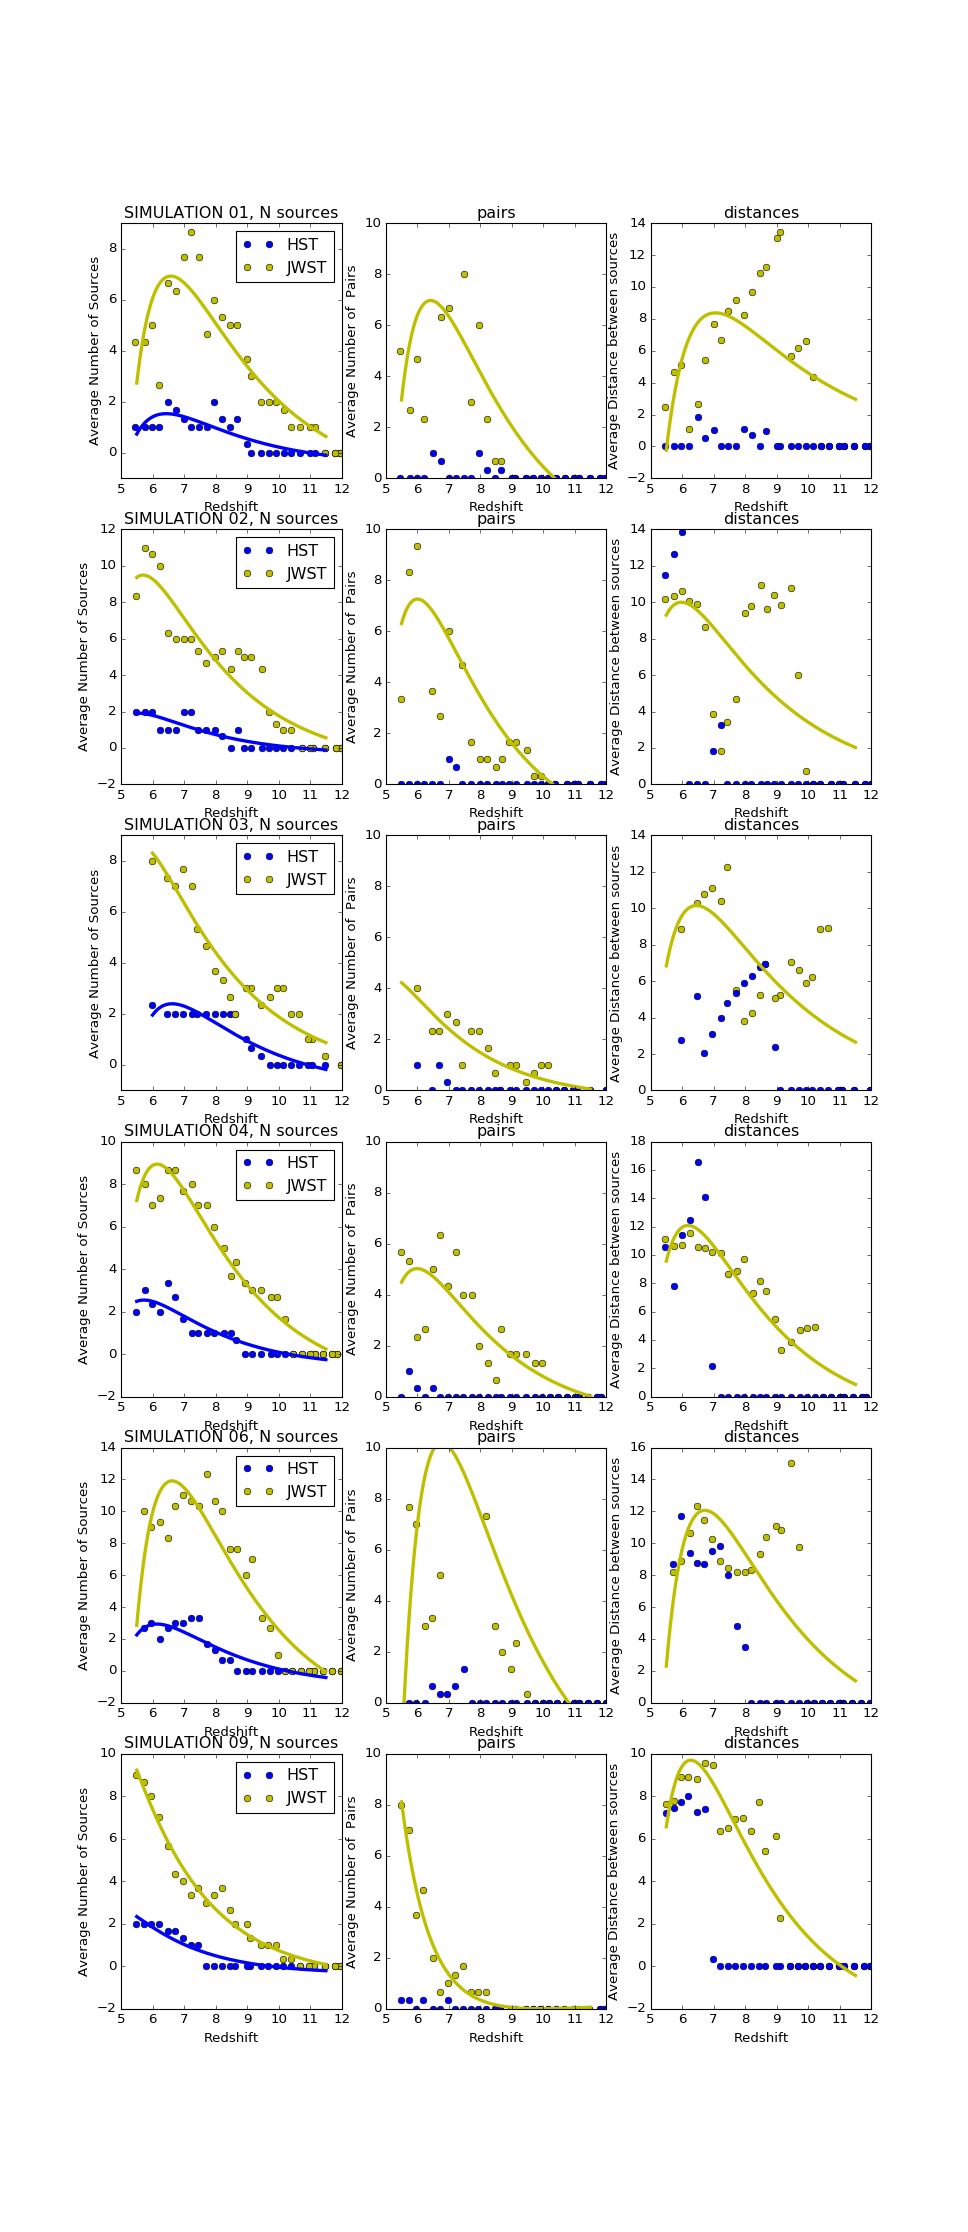

In [57]:
plt.figure(1)
plt.subplot(6,3,1)
plt.title('SIMULATION 01, N sources')
plt.plot(sim_01_redshifts, HST_01,'bo', label='HST')
plt.plot(sim_01_redshifts, JWST_01,'yo', label='JWST')
plt.plot(redshifts_sample,trial_f(redshifts_sample,*JWST_params_sim1),'y-',lw=3)
plt.plot(redshifts_sample,trial_f(redshifts_sample,*HST_params_sim1),'b-',lw=3)
plt.ylabel('Average Number of Sources')
plt.xlabel('Redshift')
plt.legend(loc='upper right')

plt.subplot(6,3,2)
plt.ylim(0,10)
plt.title('pairs')
plt.plot(sim_01_redshifts, JWST_01s[:,0],'yo', label='JWST')
plt.plot(sim_01_redshifts, HST_01s[:,0],'bo', label='HST')
plt.plot(redshifts_sample,trial_f(redshifts_sample,*JWST_params_sim1_pairs),'y-',lw=3)
plt.ylabel('Average Number of  Pairs')
plt.xlabel('Redshift')

plt.subplot(6,3,3)
plt.title('distances')
plt.plot(sim_01_redshifts, JWST_01s[:,2],'yo', label='JWST')
plt.plot(sim_01_redshifts, HST_01s[:,2],'bo', label='HST')
plt.plot(redshifts_sample,trial_f(redshifts_sample,*JWST_params_sim1_dist),'y-',lw=3)
plt.ylabel('Average Distance between sources')
plt.xlabel('Redshift')


plt.subplot(6,3,4)
plt.title('SIMULATION 02, N sources')
plt.plot(sim_02_redshifts, HST_02,'bo', label='HST')
plt.plot(sim_02_redshifts, JWST_02,'yo', label='JWST')
plt.plot(redshifts_sample,trial_f(redshifts_sample,*JWST_params_sim2),'y-',lw=3)
plt.plot(redshifts_sample,trial_f(redshifts_sample,*HST_params_sim2),'b-',lw=3)
plt.ylabel('Average Number of Sources')
plt.xlabel('Redshift')
plt.legend(loc='upper right')

plt.subplot(6,3,5)
plt.ylim(0,10)
plt.title('pairs')
plt.plot(sim_02_redshifts, JWST_02s[:,0],'yo', label='JWST')
plt.plot(sim_02_redshifts, HST_02s[:,0],'bo', label='HST')
plt.plot(redshifts_sample,trial_f(redshifts_sample,*JWST_params_sim2_pairs),'y-',lw=3)
plt.ylabel('Average Number of  Pairs')
plt.xlabel('Redshift')

plt.subplot(6,3,6)
plt.title('distances')
plt.plot(sim_02_redshifts, JWST_02s[:,2],'yo', label='JWST')
plt.plot(sim_02_redshifts, HST_02s[:,2],'bo', label='HST')
plt.plot(redshifts_sample,trial_f(redshifts_sample,*JWST_params_sim2_dist),'y-',lw=3)
plt.ylabel('Average Distance between sources')
plt.xlabel('Redshift')


plt.subplot(6,3,7)
plt.title('SIMULATION 03, N sources')
plt.plot(sim_03_redshifts, HST_03,'bo', label='HST')
plt.plot(sim_03_redshifts, JWST_03,'yo', label='JWST')
plt.plot(redshifts_sample_2,trial_f(redshifts_sample_2,*JWST_params_sim3),'y-',lw=3)
plt.plot(redshifts_sample_2,trial_f(redshifts_sample_2,*HST_params_sim3),'b-',lw=3)
plt.ylabel('Average Number of Sources')
plt.xlabel('Redshift')
plt.legend(loc='upper right')

plt.subplot(6,3,8)
plt.ylim(0,10)
plt.title('pairs')
plt.plot(sim_03_redshifts, JWST_03s[:,0],'yo', label='JWST')
plt.plot(sim_03_redshifts, HST_03s[:,0],'bo', label='HST')
plt.plot(redshifts_sample,trial_f(redshifts_sample,*JWST_params_sim3_pairs),'y-',lw=3)
plt.ylabel('Average Number of  Pairs')
plt.xlabel('Redshift')

plt.subplot(6,3,9)
plt.title('distances')
plt.plot(sim_03_redshifts, JWST_03s[:,2],'yo', label='JWST')
plt.plot(sim_03_redshifts, HST_03s[:,2],'bo', label='HST')
plt.plot(redshifts_sample,trial_f(redshifts_sample,*JWST_params_sim3_dist),'y-',lw=3)
plt.ylabel('Average Distance between sources')
plt.xlabel('Redshift')


plt.subplot(6,3,10)
plt.title('SIMULATION 04, N sources')
plt.plot(sim_04_redshifts, HST_04,'bo', label='HST')
plt.plot(sim_04_redshifts, JWST_04,'yo', label='JWST')
plt.plot(redshifts_sample,trial_f(redshifts_sample,*JWST_params_sim4),'y-',lw=3)
plt.plot(redshifts_sample,trial_f(redshifts_sample,*HST_params_sim4),'b-',lw=3)
plt.ylabel('Average Number of Sources')
plt.xlabel('Redshift')
plt.legend(loc='upper right')

plt.subplot(6,3,11)
plt.ylim(0,10)
plt.title('pairs')
plt.plot(sim_04_redshifts, JWST_04s[:,0],'yo', label='JWST')
plt.plot(sim_04_redshifts, HST_04s[:,0],'bo', label='HST')
plt.plot(redshifts_sample,trial_f(redshifts_sample,*JWST_params_sim4_pairs),'y-',lw=3)
plt.ylabel('Average Number of  Pairs')
plt.xlabel('Redshift')

plt.subplot(6,3,12)
plt.title('distances')
plt.plot(sim_04_redshifts, JWST_04s[:,2],'yo', label='JWST')
plt.plot(sim_04_redshifts, HST_04s[:,2],'bo', label='HST')
plt.plot(redshifts_sample,trial_f(redshifts_sample,*JWST_params_sim4_dist),'y-',lw=3)
plt.ylabel('Average Distance between sources')
plt.xlabel('Redshift')


plt.subplot(6,3,13)
plt.title('SIMULATION 06, N sources')
plt.plot(sim_06_redshifts, HST_06,'bo', label='HST')
plt.plot(sim_06_redshifts, JWST_06,'yo', label='JWST')
plt.plot(redshifts_sample,trial_f(redshifts_sample,*JWST_params_sim6),'y-',lw=3)
plt.plot(redshifts_sample,trial_f(redshifts_sample,*HST_params_sim6),'b-',lw=3)
plt.ylabel('Average Number of Sources')
plt.xlabel('Redshift')
plt.legend(loc='upper right')

plt.subplot(6,3,14)
plt.ylim(0,10)
plt.title('pairs')
plt.plot(sim_06_redshifts, JWST_06s[:,0],'yo', label='JWST')
plt.plot(sim_06_redshifts, HST_06s[:,0],'bo', label='HST')
plt.plot(redshifts_sample,trial_f(redshifts_sample,*JWST_params_sim6_pairs),'y-',lw=3)
plt.ylabel('Average Number of  Pairs')
plt.xlabel('Redshift')

plt.subplot(6,3,15)
plt.title('distances')
plt.plot(sim_06_redshifts, JWST_06s[:,2],'yo', label='JWST')
plt.plot(sim_06_redshifts, HST_06s[:,2],'bo', label='HST')
plt.plot(redshifts_sample,trial_f(redshifts_sample,*JWST_params_sim6_dist),'y-',lw=3)
plt.ylabel('Average Distance between sources')
plt.xlabel('Redshift')


plt.subplot(6,3,16)
plt.title('SIMULATION 09, N sources')
plt.plot(sim_09_redshifts, HST_09,'bo', label='HST')
plt.plot(sim_09_redshifts, JWST_09,'yo', label='JWST')
plt.plot(redshifts_sample,trial_f(redshifts_sample,*JWST_params_sim9),'y-',lw=3)
plt.plot(redshifts_sample,trial_f(redshifts_sample,*HST_params_sim9),'b-',lw=3)
plt.ylabel('Average Number of Sources')
plt.xlabel('Redshift')
plt.legend(loc='upper right')

plt.subplot(6,3,17)
plt.ylim(0,10)
plt.title('pairs')
plt.plot(sim_09_redshifts, JWST_09s[:,0],'yo', label='JWST')
plt.plot(sim_09_redshifts, HST_09s[:,0],'bo', label='HST')
plt.plot(redshifts_sample,trial_f(redshifts_sample,*JWST_params_sim9_pairs),'y-',lw=3)
plt.ylabel('Average Number of  Pairs')
plt.xlabel('Redshift')

plt.subplot(6,3,18)
plt.title('distances')
plt.plot(sim_09_redshifts, JWST_09s[:,2],'yo', label='JWST')
plt.plot(sim_09_redshifts, HST_09s[:,2],'bo', label='HST')
plt.plot(redshifts_sample,trial_f(redshifts_sample,*JWST_params_sim9_dist),'y-',lw=3)
plt.ylabel('Average Distance between sources')
plt.xlabel('Redshift')

In [5]:
HST_WFC3CAM_pixel_size = 0.13   # arcsec per pixel
JWST_NIRCAM_pixel_size = 0.032  # arcsec per pixel

def pairs2(data_sources,N,X,Y):
    
    print('N sources:', N)
    print(' ')
    
    if(N>1):
        x_coord = np.zeros(N)
        y_coord = np.zeros(N)

        sources_distances = np.zeros(N)
        pairs_distances = []
        pairs = 0

        for j in range(1,N+1):
            A = np.argwhere(data_sources==j)
            x_coord[j-1] = np.mean(X[A[:,0],A[:,1]])
            y_coord[j-1] = np.mean(Y[A[:,0],A[:,1]])
        
        for i in range(0,N):
            A = np.sqrt(np.power((x_coord-x_coord[i]),2) + np.power((y_coord-y_coord[i]),2))
            print(np.round(A,3))
        
        print(' ')
        for i in range(0,N-1):
            A = np.sqrt(np.power((x_coord[i+1:]-x_coord[i]),2) + np.power((y_coord[i+1:]-y_coord[i]),2))
            B = np.where(A<=3)
            pairs += len(B[0])
            for ii in range(len(B[0])):
                sources_distances[i] += 1
                sources_distances[i+1+B[0][ii]] += 1
        

            pairs_distances = np.concatenate((pairs_distances, A[B[0]]))
            
        print('Pairs Distances')
        print(pairs_distances)
        print(' ')
        print('Sources in group')
        print(sources_distances)
        print(' ')
        print(np.where(sources_distances>0))
        print(len(np.where(sources_distances>0)[0]))
        
        if(len(pairs_distances)>0):
            return pairs, np.mean(pairs_distances), np.mean(sources_distances)
        else:
            return pairs, 0, np.mean(sources_distances)
    else: 
        return 0,0,0

z:  8.98
N sources: 9
 
[  0.      5.98    5.634  12.522  18.654  18.613  20.029  21.099  25.218]
[  5.98    0.      4.618   7.344  15.695  14.451  16.201  16.762  23.805]
[  5.634   4.618   0.      7.757  13.054  13.056  14.41   15.563  20.147]
[ 12.522   7.344   7.757   0.      9.958   7.52    9.474   9.613  19.108]
[ 18.654  15.695  13.054   9.958   0.      4.262   3.243   5.539   9.345]
[ 18.613  14.451  13.056   7.52    4.262   0.      2.055   2.523  13.26 ]
[ 20.029  16.201  14.41    9.474   3.243   2.055   0.      2.301  11.486]
[ 21.099  16.762  15.563   9.613   5.539   2.523   2.301   0.     13.379]
[ 25.218  23.805  20.147  19.108   9.345  13.26   11.486  13.379   0.   ]
 
Pairs Distances
[ 2.05452593  2.52347213  2.30087404]
 
Sources in group
[ 0.  0.  0.  0.  0.  2.  2.  2.  0.]
 
(array([5, 6, 7]),)
3
N pairs: 3
Average dist in pairs: 2.29295736507
Average dist between all sources: 0.666666666667


<IPython.core.display.Javascript object>


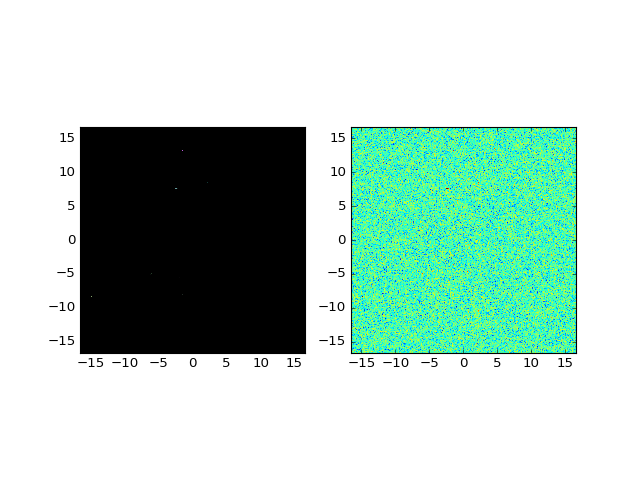

In [8]:
idx = 12
threshold = 2
npixels = 3
print('z: ', np.round(sim_06_redshifts[idx],2))
Nbins_JWST = int(sim_06_ang_size/JWST_NIRCAM_pixel_size)
ang = sim_06_ang_size/2
pixels_ang_coords_JWST = (np.linspace(-ang, ang, Nbins_JWST + 1) + np.linspace(-ang, ang, Nbins_JWST + 1))/2
X_JWST,Y_JWST = np.meshgrid(pixels_ang_coords_JWST,pixels_ang_coords_JWST)

temp = np.loadtxt(sim_06_JWST_data_z[idx])
data = detect_sources(temp, threshold, npixels)
pairs,p_dist,s_dist = pairs2(np.array(data),data.nlabels,X_JWST,Y_JWST)
data = np.array(data)

print('N pairs:', pairs)
print('Average dist in pairs:', p_dist)
print('Average dist between all sources:', s_dist)

extent = np.array([-ang,ang,-ang,ang])
plt.figure(10)
plt.subplot(1,2,1)
plt.imshow(data,cmap=rand_cmap,extent=extent)
plt.subplot(1,2,2)
plt.imshow(temp,vmax=np.max(temp)/10,interpolation='nearest',extent=extent)

z:  7.73
N sources: 13
 
[  0.     14.747  15.155  15.41   12.899  14.119  16.187  16.906  16.289
  16.673  17.642  18.403  28.982]
[ 14.747   0.      0.43    0.749   5.161   3.263   2.357   2.659   2.639
   2.669   3.551   4.059  14.85 ]
[ 15.155   0.43    0.      0.554   5.494   3.533   2.28    2.453   2.576
   2.524   3.343   3.783  14.534]
[ 15.41    0.749   0.554   0.      5.244   3.205   1.727   1.927   2.024
   1.975   2.82    3.31   14.105]
[ 12.899   5.161   5.494   5.244   0.      2.123   4.673   5.47    4.58
   5.088   5.814   6.661  16.329]
[ 14.119   3.263   3.533   3.205   2.123   0.      2.575   3.381   2.517
   3.015   3.826   4.669  14.867]
[ 16.187   2.357   2.28    1.727   4.673   2.575   0.      0.809   0.301
   0.488   1.459   2.229  12.924]
[ 16.906   2.659   2.453   1.927   5.47    3.381   0.809   0.      0.905
   0.402   0.893   1.505  12.304]
[ 16.289   2.639   2.576   2.024   4.58    2.517   0.301   0.905   0.
   0.51    1.364   2.182  12.775]
[ 16.673   2.669

<IPython.core.display.Javascript object>


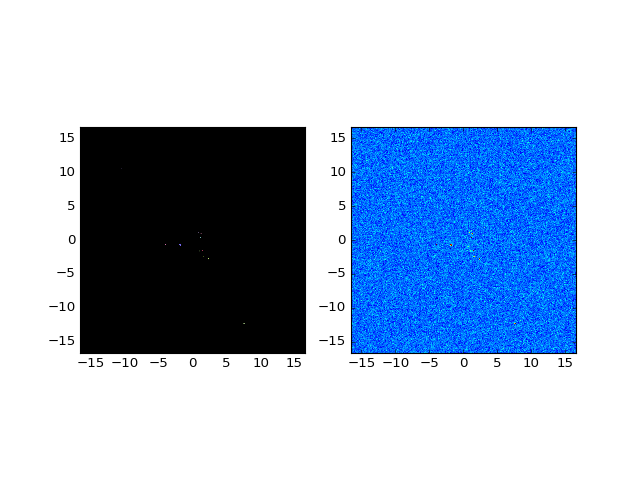

In [127]:
idx = 17
print('z: ', np.round(sim_06_redshifts[idx],2))
Nbins_JWST = int(sim_06_ang_size/JWST_NIRCAM_pixel_size)
ang = sim_06_ang_size/2
pixels_ang_coords_JWST = (np.linspace(-ang, ang, Nbins_JWST + 1) + np.linspace(-ang, ang, Nbins_JWST + 1))/2
X_JWST,Y_JWST = np.meshgrid(pixels_ang_coords_JWST,pixels_ang_coords_JWST)

temp = np.loadtxt(sim_06_JWST_data_y[idx])
data = detect_sources(temp, threshold, npixels)
pairs,p_dist,s_dist = pairs2(np.array(data),data.nlabels,X_JWST,Y_JWST)
data = np.array(data)

print('N pairs:', pairs)
print('Average dist in pairs:', p_dist)
print('Average dist between all sources:', s_dist)

extent = np.array([-ang,ang,-ang,ang])
plt.figure(16)
plt.subplot(1,2,1)
plt.imshow(data,cmap=rand_cmap,extent=extent)
plt.subplot(1,2,2)
plt.imshow(temp,vmax=np.max(temp)/10,interpolation='nearest',extent=extent)

In [58]:
print(np.round(sim_01_redshifts,2))
print(np.round(sim_02_redshifts,2))
print(np.round(sim_03_redshifts,2))
print(np.round(sim_04_redshifts,2))
print(np.round(sim_06_redshifts,2))
print(np.round(sim_09_redshifts,2))

[ 11.95  11.79  11.46  11.14  10.99  10.68  10.4   10.16   9.92   9.68
   9.45   9.11   9.     8.67   8.47   8.21   7.96   7.71   7.47   7.23   7.
   6.74   6.5    6.21   5.98   5.76   5.45]
[ 11.98  11.82  11.47  11.1   10.98  10.74  10.38  10.15   9.92   9.69
   9.46   9.13   8.92   8.7    8.49   8.2    7.99   7.71   7.43   7.23
   6.99   6.73   6.48   6.23   5.98   5.75   5.47]
[ 11.97  11.46  11.07  10.93  10.64  10.39  10.14   9.94   9.71   9.45
   9.12   8.96   8.63   8.47   8.23   7.97   7.71   7.42   7.24   6.95
   6.7    6.48   5.98]
[ 11.84  11.7   11.42  11.14  11.01  10.74  10.47  10.21   9.95   9.74
   9.44   9.14   8.95   8.66   8.48   8.26   7.96   7.74   7.45   7.24
   6.97   6.72   6.51   6.24   5.99   5.75   5.47]
[ 11.97  11.69  11.4   11.12  10.98  10.7   10.43  10.19   9.97   9.72
   9.47   9.14   8.98   8.68   8.47   8.2    7.99   7.73   7.47   7.21
   6.96   6.71   6.48   6.24   5.96   5.73]
[ 11.95  11.78  11.46  11.14  10.98  10.67  10.39  10.15   9.91   9.67
 

In [112]:
HST_03_temp_redshifts = np.hstack([sim_03_redshifts[0],0,sim_03_redshifts[1:-1],0,sim_03_redshifts[-1],0,0])
HST_03_temp_sources = np.hstack([HST_03[0],0,HST_03[1:-1],0,HST_03[-1],0,0])
JWST_03_temp_sources = np.hstack([JWST_03[0],0,JWST_03[1:-1],0,JWST_03[-1],0,0])
HST_03_temp_pairs = np.hstack([HST_03s[0,0],0,HST_03s[1:-1,0],0,HST_03s[-1,0],0,0])
JWST_03_temp_pairs = np.hstack([JWST_03s[0,0],0,JWST_03s[1:-1,0],0,JWST_03s[-1,0],0,0])

HST_06_temp_redshifts = np.hstack([sim_06_redshifts,0])
HST_06_temp_sources = np.hstack([HST_06,0])
JWST_06_temp_sources = np.hstack([JWST_06,0])
HST_06_temp_pairs = np.hstack([HST_06s[:,0],0])
JWST_06_temp_pairs = np.hstack([JWST_06s[:,0],0])

redshift_mean = np.array(sim_01_redshifts) + np.array(sim_02_redshifts)  + np.array(sim_04_redshifts) + np.array(sim_09_redshifts) +  HST_03_temp_redshifts + HST_06_temp_redshifts
sources_HST_mean = np.array(HST_01) + np.array(HST_02) + np.array(HST_04)  + np.array(HST_09) + HST_03_temp_sources + HST_06_temp_sources 
sources_JWST_mean = np.array(JWST_01) + np.array(JWST_02) + np.array(JWST_04)  + np.array(JWST_09) + JWST_03_temp_sources + JWST_06_temp_sources 
pairs_HST_mean = np.array(HST_01s[:,0]) + np.array(HST_02s[:,0]) + np.array(HST_04s[:,0])  + np.array(HST_09s[:,0]) + HST_03_temp_pairs + HST_06_temp_pairs 
pairs_JWST_mean = np.array(JWST_01s[:,0]) + np.array(JWST_02s[:,0]) + np.array(JWST_04s[:,0])  + np.array(JWST_09s[:,0]) + JWST_03_temp_pairs + JWST_06_temp_pairs 

divider = np.hstack([6,5,np.ones(len(HST_03[1:-1]))*6,5,6,5,4])

redshift_mean /= divider
sources_HST_mean /= divider
sources_JWST_mean /= divider
pairs_HST_mean /= divider
pairs_JWST_mean /= divider

print('Average Redshift:')
print(np.round(redshift_mean,2))
print(divider)

Average Redshift:
[ 11.95  11.76  11.45  11.12  10.98  10.69  10.41  10.16   9.93   9.7
   9.45   9.12   8.96   8.66   8.47   8.22   7.97   7.72   7.45   7.23
   6.97   6.72   6.49   6.22   5.97   5.74   5.47]
[ 6.  5.  6.  6.  6.  6.  6.  6.  6.  6.  6.  6.  6.  6.  6.  6.  6.  6.
  6.  6.  6.  6.  6.  5.  6.  5.  4.]


In [122]:
temp = np.vstack((np.array(JWST_01s[:,0]),np.array(JWST_02s[:,0]),np.array(JWST_04s[:,0]),np.array(JWST_09s[:,0]),JWST_03_temp_pairs,JWST_06_temp_pairs 
))
print('Redshifts:')
print(np.round(redshift_mean[17:],2))
print(' ')
print('Pairs:')
print(np.round(temp[:,17:],2))
print(' ')
print('Pairs Average')
print(np.round(pairs_JWST_mean[17:],2))


Redshifts:
[ 7.72  7.45  7.23  6.97  6.72  6.49  6.22  5.97  5.74  5.47]
 
Pairs:
[[  3.     8.    13.     6.67   6.33  11.     2.33   4.67   2.67   5.  ]
 [  1.67   4.67  12.33   6.     2.67   3.67  12.     9.33   8.33   3.33]
 [  4.     4.     5.67   4.33   6.33   5.     2.67   2.33   5.33   5.67]
 [  0.67   1.67   1.33   1.     0.67   2.     4.67   3.67   7.     8.  ]
 [  2.33   1.     2.67   3.     2.33   2.33   0.     4.     0.     0.  ]
 [ 20.67  13.    14.67  10.33   5.     3.33   3.     7.     7.67   0.  ]]
 
Pairs Average
[ 5.39  5.39  8.28  5.22  3.89  4.56  4.93  5.17  6.2   5.5 ]


<IPython.core.display.Javascript object>


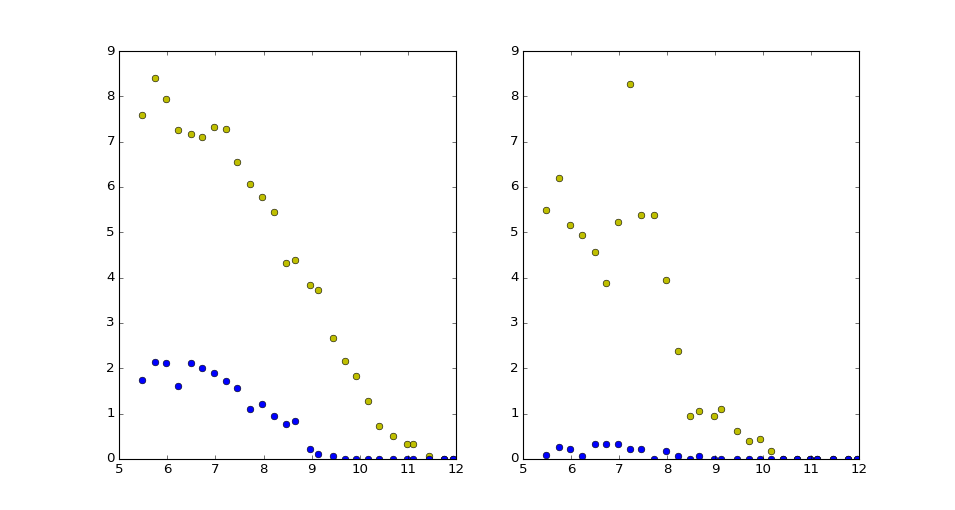

In [128]:
plt.figure(17)
plt.subplot(1,2,1)
plt.plot(redshift_mean,sources_JWST_mean,'yo')
plt.plot(redshift_mean,sources_HST_mean,'bo')
plt.subplot(1,2,2)
plt.plot(redshift_mean,pairs_JWST_mean,'yo')
plt.plot(redshift_mean,pairs_HST_mean,'bo')


In [136]:
pairs_total_HST = np.trapz(pairs_HST_mean[:21][::-1],redshift_mean[:21][::-1])
sources_total_HST = np.trapz(sources_HST_mean[:21][::-1],redshift_mean[:21][::-1])

pairs_total_JWST = np.trapz(pairs_JWST_mean[:21][::-1],redshift_mean[:21][::-1])
sources_total_JWST = np.trapz(sources_JWST_mean[:21][::-1],redshift_mean[:21][::-1])


print(redshift_mean[20])
print('Total number of sources for z > 6.97:')
print(sources_total_HST)
print('Total number of pairs for z > 6.97:')
print(pairs_total_HST)
print('Pairs/Sources ratio')
print(pairs_total_HST/sources_total_HST)
print('-------------')
print(redshift_mean[20])
print('Total number of sources for z > 6.97:')
print(sources_total_JWST)
print('Total number of pairs for z > 6.97:')
print(pairs_total_JWST)
print('Pairs/Sources ratio')
print(pairs_total_JWST/sources_total_JWST)

6.97290462078
Total number of sources for z > 6.97:
2.333985003
Total number of pairs for z > 6.97:
0.21877412515
Pairs/Sources ratio
0.0937341606178
-------------
6.97290462078
Total number of sources for z > 6.97:
15.0148372584
Total number of pairs for z > 6.97:
8.31157134326
Pairs/Sources ratio
0.553557204797


In [ ]:
print()